In [1]:
import brainpy as bp
import brainpy.math as bm
import numpy as np
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="7,8" # specify which GPU(s) to be used
bm.disable_gpu_memory_preallocation()
bm.set_platform('gpu')

/home/spirit/anaconda3/envs/slca/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
simulation_number = 200
model = bp.neurons.GIF(simulation_number, method='rk2')
input_current = bm.linspace(0.,30.,simulation_number)
I_ext_list    = np.array(input_current)
runner = bp.dyn.DSRunner(model, monitors=['spike','V'], inputs=['input',input_current],dt=0.01)
runner.run(1000.)
spike_sum = runner.mon['spike'].sum(axis=0) 
print(spike_sum)

Predict 100000 steps: : 100%|██████████| 100000/100000 [00:41<00:00, 2383.28it/s]

[   0    0    0    0    0    0    0   16   28   37   45   54   62   70
   77   85   93  101  108  116  124  131  139  146  154  162  169  177
  184  192  200  207  215  222  229  237  245  252  260  268  275  283
  290  297  305  313  320  327  335  343  350  358  366  373  380  387
  395  403  411  418  425  432  440  448  456  462  471  478  485  492
  500  507  515  523  531  537  546  552  561  568  574  584  591  598
  606  613  621  628  636  645  649  657  666  675  680  689  694  704
  709  719  724  735  740  746  757  763  769  781  787  793  800  806
  813  826  833  840  847  854  862  869  877  884  892  900  909  909
  917  925  934  943  952  961  961  970  980  990  990 1000 1010 1020
 1020 1030 1041 1052 1052 1063 1075 1075 1086 1086 1098 1111 1111 1123
 1123 1136 1149 1149 1162 1162 1176 1176 1190 1190 1204 1204 1219 1219
 1234 1234 1250 1250 1265 1265 1282 1282 1298 1298 1315 1315 1315 1333
 1333 1351 1351 1351 1369 1369 1388 1388 1388 1408 1408 1428 1428 1428
 1449 

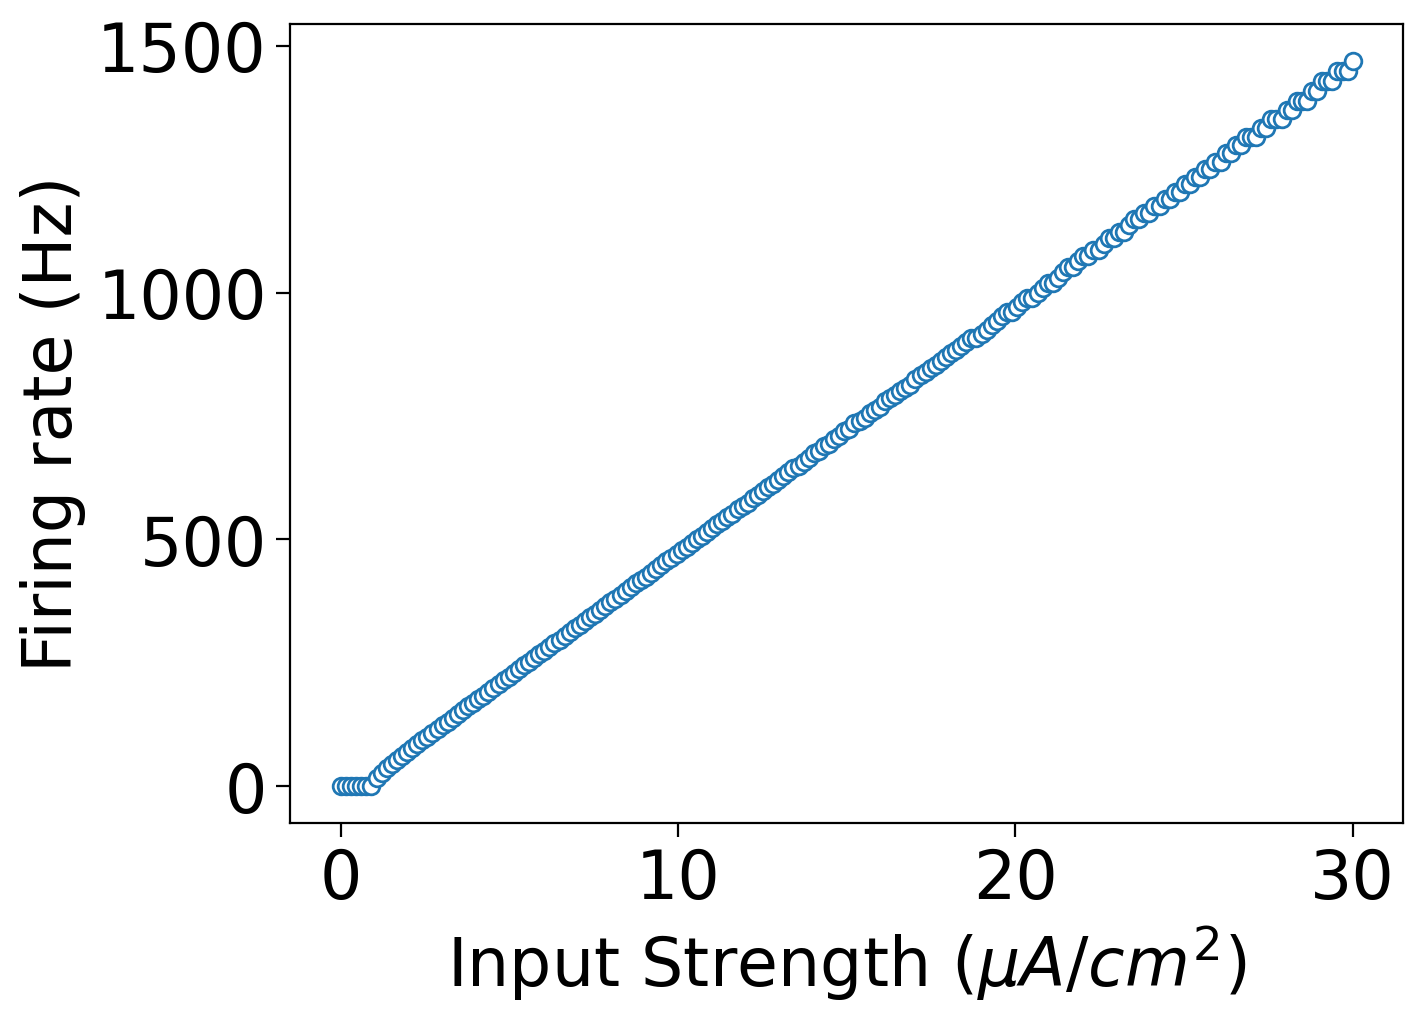

In [11]:
import matplotlib.pyplot as plt
plt_style = {
    'figure.autolayout' : True,
    'font.size' : 24,
    'lines.linewidth' : 2,
    # 'xtick.labelsize' : 'medium',
    # 'ytick.labelsize' : 'medium',
        'xtick.labelsize' : 'medium',
    'ytick.labelsize' : 'medium',
    'legend.fontsize' : 'medium',
    'axes.spines.top' : True,
    'axes.spines.right' : True,
    'xtick.major.size' : 5,
    'ytick.major.size' : 5,
    'legend.fontsize' : 24,
    'axes.labelsize' : 24,
    'axes.titlesize' : 24,
    }
for key, val in plt_style.items():
    plt.rcParams[key] = val

firing_rate_list = spike_sum

#paint
fig, gs = bp.visualize.get_figure(1, 1, 5, 7)
firing_rate_list = bm.array(firing_rate_list)
# firing_rate_list[firing_rate_list < 10] =0
plt.plot(I_ext_list, firing_rate_list, marker = "o", markerfacecolor = 'white',linewidth =1)
plt.xlabel(r'Input Strength ($\mu A/cm^2$)')
plt.ylabel('Firing rate (Hz)')
# plt.xlim(I_ext_list[0]-0.1, I_ext_list[-1]+0.1)
# plt.ylim([-5,100])
# plt.xlim(0, 30)
plt.show()

1.0552764
[-1.87392121  6.91853151 -9.31760692  5.73923156 18.46991473  0.66899093]


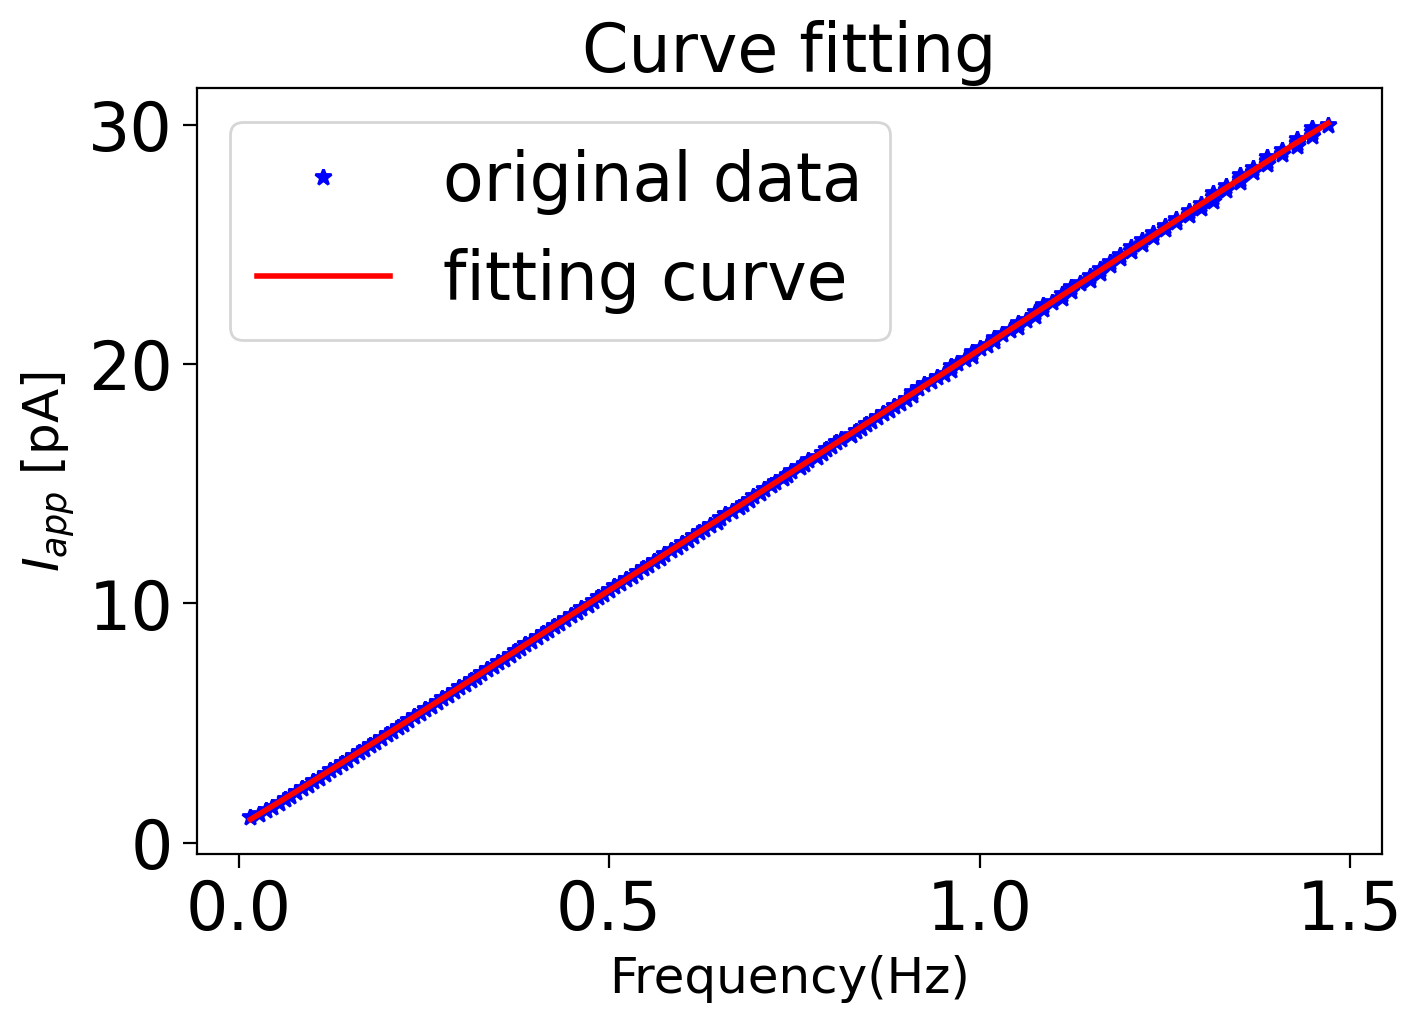

In [12]:
y = I_ext_list[firing_rate_list>0]
x = firing_rate_list[firing_rate_list>0]/1000
print(y[0])

coefficients = np.polyfit(x, y, deg=5)  # 2表示二次多项式
poly = np.poly1d(coefficients)

# 生成拟合曲线上的点
y_fit = poly(x)
print(coefficients)
fig, gs = bp.visualize.get_figure(1, 1, 5, 7)
# 绘制拟合曲线和原始数据
plt.plot(x, y,'b*',label='original data')
plt.plot(x, y_fit,'r',label='fitting curve')
plt.ylabel('$I_{app}$ [pA]', fontsize=18)
plt.xlabel('Frequency(Hz)', fontsize=18)
plt.title('Curve fitting')
plt.legend()
plt.show()